In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
train_data = pd.read_csv('../input/titanic/train.csv', index_col='PassengerId')
test_data = pd.read_csv('../input/titanic/test.csv', index_col='PassengerId')

In [4]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_data.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [6]:
train_data.drop(labels=['Ticket', 'Cabin'], axis=1, inplace=True)
test_data.drop(labels=['Ticket', 'Cabin'], axis=1, inplace=True)

In [7]:
train_data.replace({'Sex': {'male':0, 'female':1}}, inplace=True)
test_data.replace({'Sex': {'male':0, 'female':1}}, inplace=True)

In [8]:
train_data[['Pclass', 'Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [9]:
train_data[['Sex', 'Survived']].groupby(['Sex']).mean()

,Survived
Sex,
0,0.188908
1,0.742038


In [10]:
train_data[['Embarked', 'Survived']].groupby(['Embarked']).mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


In [11]:
train_data['Embarked'].fillna('S', inplace=True)
test_data['Embarked'].fillna('S', inplace=True)

In [12]:
train_data['IsAlone'] = ((train_data['SibSp']==0) & (train_data['Parch']==0)).astype('int')
test_data['IsAlone'] = ((test_data['SibSp']==0) & (test_data['Parch']==0)).astype('int')

In [13]:
train_data[['IsAlone', 'Survived']].groupby(['IsAlone']).mean()

,Survived
IsAlone,
0,0.505650
1,0.303538


In [14]:
train_data = train_data.drop(['SibSp', 'Parch'], axis=1)
test_data = test_data.drop(['SibSp', 'Parch'], axis=1)

In [15]:
train_data.replace({'Embarked': {'S':0, 'C':1, 'Q':2}}, inplace=True)
test_data.replace({'Embarked': {'S':0, 'C':1, 'Q':2}}, inplace=True)

<AxesSubplot:xlabel='Fare'>

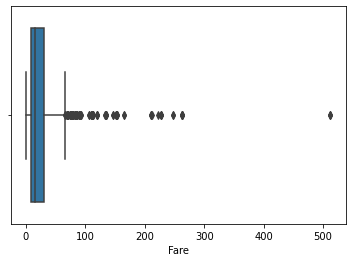

In [16]:
sns.boxplot(x=train_data['Fare'])

In [17]:
train_data.describe()

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.699118,32.204208,0.361392,0.602694
std,0.486592,0.836071,0.477990,14.526497,49.693429,0.635673,0.489615
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,20.125000,7.910400,0.000000,0.000000
50%,0.000000,3.000000,0.000000,28.000000,14.454200,0.000000,1.000000
75%,1.000000,3.000000,1.000000,38.000000,31.000000,1.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,512.329200,2.000000,1.000000


In [18]:
train_data['Fare'].fillna(train_data['Fare'].dropna().median(), inplace=True)
test_data['Fare'].fillna(test_data['Fare'].dropna().median(), inplace=True)

In [19]:
train_data.loc[ train_data['Fare'] <= 7.91, 'Fare'] = 0
train_data.loc[(train_data['Fare'] > 7.91) & (train_data['Fare'] <= 14.454), 'Fare'] = 1
train_data.loc[(train_data['Fare'] > 14.454) & (train_data['Fare'] <= 31), 'Fare'] = 2
train_data.loc[(train_data['Fare'] > 31) & (train_data['Fare'] <= 80), 'Fare'] = 3
train_data.loc[ train_data['Fare'] > 80, 'Fare'] = 4
train_data['Fare'] = train_data['Fare'].astype(int)

test_data.loc[ test_data['Fare'] <= 7.91, 'Fare'] = 0
test_data.loc[(test_data['Fare'] > 7.91) & (test_data['Fare'] <= 14.454), 'Fare'] = 1
test_data.loc[(test_data['Fare'] > 14.454) & (test_data['Fare'] <= 31), 'Fare'] = 2
test_data.loc[(test_data['Fare'] > 31) & (test_data['Fare'] <= 80), 'Fare'] = 3
test_data.loc[ test_data['Fare'] > 80, 'Fare'] = 4
test_data['Fare'] = test_data['Fare'].astype(int)

<AxesSubplot:xlabel='Age'>

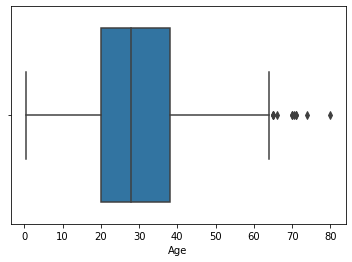

In [20]:
sns.boxplot(x=train_data['Age'])

In [21]:
train_data['Age'].fillna(train_data['Age'].dropna().median(), inplace=True)
test_data['Age'].fillna(test_data['Age'].dropna().median(), inplace=True)

In [22]:
train_data['AgeBand'] = pd.cut(train_data['Age'], 5)
train_data[['AgeBand', 'Survived']].groupby('AgeBand').mean()

,Survived
AgeBand,
"(0.34, 16.336]",0.550000
"(16.336, 32.252]",0.344168
"(32.252, 48.168]",0.404255
"(48.168, 64.084]",0.434783
"(64.084, 80.0]",0.090909


In [23]:
train_data.loc[ train_data['Age'] <= 16, 'Age'] = 0
train_data.loc[(train_data['Age'] > 16) & (train_data['Age'] <= 32), 'Age'] = 1
train_data.loc[(train_data['Age'] > 32) & (train_data['Age'] <= 48), 'Age'] = 2
train_data.loc[(train_data['Age'] > 48) & (train_data['Age'] <= 64), 'Age'] = 3
train_data.loc[ train_data['Age'] > 64, 'Age'] = 4
train_data['Age'] = train_data['Age'].astype(int)

test_data.loc[ test_data['Age'] <= 16, 'Age'] = 0
test_data.loc[(test_data['Age'] > 16) & (test_data['Age'] <= 32), 'Age'] = 1
test_data.loc[(test_data['Age'] > 32) & (test_data['Age'] <= 48), 'Age'] = 2
test_data.loc[(test_data['Age'] > 48) & (test_data['Age'] <= 64), 'Age'] = 3
test_data.loc[ test_data['Age'] > 64, 'Age'] = 4
test_data['Age'] = test_data['Age'].astype(int)

In [24]:
train_data.drop(['AgeBand'], axis=1, inplace=True)

In [25]:
train_data.head(10)

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,IsAlone
PassengerId,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,1,0,0,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,3,1,0
3,1,3,"Heikkinen, Miss. Laina",1,1,1,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,3,0,0
5,0,3,"Allen, Mr. William Henry",0,2,1,0,1
6,0,3,"Moran, Mr. James",0,1,1,2,1
7,0,1,"McCarthy, Mr. Timothy J",0,3,3,0,1
8,0,3,"Palsson, Master. Gosta Leonard",0,0,2,0,0
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,1,1,0,0


In [26]:
train_data['Title'] = train_data['Name'].str.extract('([A-Za-z]+)\.', expand=False)
train_data['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [27]:
train_data[['Title', 'Survived']].groupby('Title', as_index=False).mean()

,Title,Survived
0,Capt,0.000000
1,Col,0.500000
2,Countess,1.000000
3,Don,0.000000
4,Dr,0.428571
5,Jonkheer,0.000000
6,Lady,1.000000
7,Major,0.500000
8,Master,0.575000
9,Miss,0.697802


In [28]:
test_data['Title'] = test_data['Name'].str.extract('([A-Za-z]+)\.', expand=False)

In [29]:
train_data['Title'].replace(['Dr', 'Rev', 'Major', 'Col', 'Countess', 'Capt',\
                             'Ms', 'Sir', 'Mme', 'Don', 'Jonkheer'], 'Rare', inplace=True)
train_data['Title'].replace(['Lady', 'Mlle'], 'Miss', inplace=True)
test_data['Title'].replace(['Dr', 'Rev', 'Major', 'Col', 'Countess', 'Capt',\
                             'Ms', 'Sir', 'Mme', 'Don', 'Jonkheer'], 'Rare', inplace=True)
test_data['Title'].replace(['Lady', 'Mlle'], 'Miss', inplace=True)

In [30]:
train_data[['Title', 'Survived']].groupby('Title', as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.792000
4,Rare,0.375000


In [31]:
title_mapping = {'Master': 1, 'Miss': 2, 'Mr': 3, 'Mrs': 4, 'Rare': 5}

train_data['Title'] = train_data['Title'].map(title_mapping)
train_data['Title'] = train_data['Title'].fillna(0)
test_data['Title'] = test_data['Title'].map(title_mapping)
test_data['Title'] = test_data['Title'].fillna(0)

In [32]:
train_data.drop('Name', axis=1, inplace=True)
test_data.drop('Name', axis=1, inplace=True)
train_data.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone,Title
PassengerId,,,,,,,,
1,0,3,0,1,0,0,0,3
2,1,1,1,2,3,1,0,4
3,1,3,1,1,1,0,1,2
4,1,1,1,2,3,0,0,4
5,0,3,0,2,1,0,1,3
6,0,3,0,1,1,2,1,3
7,0,1,0,3,3,0,1,3
8,0,3,0,0,2,0,0,1
9,1,3,1,1,1,0,0,4


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [34]:
models = {'LinearSVC': LinearSVC(),
          'KNN': KNeighborsClassifier(),
          'SVC': SVC(),
          'LogisticRegression': LogisticRegression(),
          'RandomForestClassifier': RandomForestClassifier(),
          'DecisionTree': DecisionTreeClassifier(),
          'Perceptron': Perceptron(),
          'SGDClassifier': SGDClassifier(),
          'XGBoost': xgb.XGBClassifier(use_label_encoder=False)}

results = {}

In [35]:
from sklearn.model_selection import train_test_split

X = train_data.drop("Survived", axis=1)
y = train_data["Survived"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [36]:
for name, model in models.items():
    model.fit(X_train, y_train)
    results[name] = model.score(X_val, y_val)

results

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


{'LinearSVC': 0.8324022346368715,
 'KNN': 0.8044692737430168,
 'SVC': 0.8603351955307262,
 'LogisticRegression': 0.8212290502793296,
 'RandomForestClassifier': 0.8435754189944135,
 'DecisionTree': 0.8379888268156425,
 'Perceptron': 0.7821229050279329,
 'SGDClassifier': 0.6871508379888268,
 'XGBoost': 0.8491620111731844}

In [37]:
param_svc = {
    'C': [0.5, 1.0, 2.0],
    'kernel': ['rbf', 'poly', 'sigmoid'],
    'degree': [3, 5, 8, 10],
    'gamma': ['scale', 'auto']  
}

grid_svc = GridSearchCV(SVC(), 
                        param_svc,
                        cv=5)
grid_svc.fit(X_train, y_train)
grid_svc.best_params_, grid_svc.best_score_

({'C': 2.0, 'degree': 3, 'gamma': 'auto', 'kernel': 'rbf'}, 0.8034472569683837)

In [38]:
grid_svc.best_estimator_.score(X_val, y_val)

0.8547486033519553

In [39]:
print(f"Accuracy {np.mean(cross_val_score(grid_svc.best_estimator_, X, y, cv=5, scoring='accuracy'))}")
print(f"Recall {np.mean(cross_val_score(grid_svc.best_estimator_, X, y, cv=5, scoring='recall'))}")
print(f"Precision {np.mean(cross_val_score(grid_svc.best_estimator_, X, y, cv=5, scoring='precision'))}")
print(f"F1 {np.mean(cross_val_score(grid_svc.best_estimator_, X, y, cv=5, scoring='f1'))}")

Accuracy 0.8136965664427847
Recall 0.6752770673486787
Precision 0.8079108361915436
F1 0.734304782673969


In [40]:
param_xgb = {
    "max_depth": [3, 5, 9],
    "learning_rate": [0.1, 0.3, 1],
    "gamma": [0, 1, 3],
    "reg_alpha": [0, 1, 5],
    "reg_lambda": [0, 1, 5],
}

grid_xgb = GridSearchCV(xgb.XGBClassifier(use_label_encoder=False), 
                        param_xgb,
                        cv=5)

grid_xgb.fit(X_train, y_train)
grid_xgb.best_params_, grid_xgb.best_score_

({'gamma': 0,
  'learning_rate': 0.3,
  'max_depth': 9,
  'reg_alpha': 1,
  'reg_lambda': 1},
 0.8132867132867133)

In [41]:
grid_xgb.best_estimator_.score(X_val, y_val)

0.8659217877094972

In [42]:
print(f"Accuracy {np.mean(cross_val_score(grid_xgb.best_estimator_, X, y, cv=5, scoring='accuracy'))}")
print(f"Recall {np.mean(cross_val_score(grid_xgb.best_estimator_, X, y, cv=5, scoring='recall'))}")
print(f"Precision {np.mean(cross_val_score(grid_xgb.best_estimator_, X, y, cv=5, scoring='precision'))}")
print(f"F1 {np.mean(cross_val_score(grid_xgb.best_estimator_, X, y, cv=5, scoring='f1'))}")

Accuracy 0.8226978846274559
Recall 0.7044757033248082
Precision 0.8122069425705565
F1 0.75258129863503


In [43]:
pred = grid_svc.best_estimator_.predict(test_data)